In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from cpp_soft_info import get_KDEs
from Scratch import load_calibration_memory
from result_saver import SaverProvider

provider = SaverProvider()
all_memories = load_calibration_memory(provider, tobecalib_backend='ibm_sherbrooke', other_date='2021-10-30')

import pickle 
with open('all_memories.pkl', 'wb') as f:
    pickle.dump(all_memories, f)

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.


In [2]:
import pickle
from cpp_soft_info import get_KDEs

with open('all_memories.pkl', 'rb') as f:
    all_memories = pickle.load(f)

bandwiths = [0.2]*127

kde_dict = get_KDEs(all_memories, bandwiths)

In [3]:
from cpp_soft_info import generate_grid_and_estimate_density

num_points = 30
num_std = 3

grid_dict = generate_grid_and_estimate_density(kde_dict, num_points, num_std)
# grid_dict

{0: (array([9.29607730e-03, 1.24315673e-02, 1.64816893e-02, 2.49965057e-02,
         3.11904153e-02, 3.85710750e-02, 4.69523811e-02, 6.40755992e-02,
         7.31511053e-02, 8.22695747e-02, 9.11616471e-02, 1.07036927e-01,
         1.12552758e-01, 1.16463268e-01, 1.18396349e-01, 1.16913140e-01,
         1.13510252e-01, 1.08304792e-01, 1.01643908e-01, 8.63591506e-02,
         7.76072993e-02, 6.88063092e-02, 5.09417097e-02, 4.22270009e-02,
         3.44921523e-02, 2.78724669e-02, 1.83086360e-02, 1.35850042e-02,
         9.99985071e-03, 7.27579997e-03, 1.26011394e-02, 1.71169360e-02,
         2.30146968e-02, 3.36530823e-02, 4.27318662e-02, 5.33946225e-02,
         6.55813981e-02, 8.49849598e-02, 9.81714991e-02, 1.11552557e-01,
         1.24413281e-01, 1.41401209e-01, 1.49514039e-01, 1.55114143e-01,
         1.57938113e-01, 1.56501009e-01, 1.51602236e-01, 1.44047004e-01,
         1.34355998e-01, 1.16145452e-01, 1.03432154e-01, 9.06331546e-02,
         7.10710288e-02, 5.83992267e-02, 4.71580

# Plot the densities

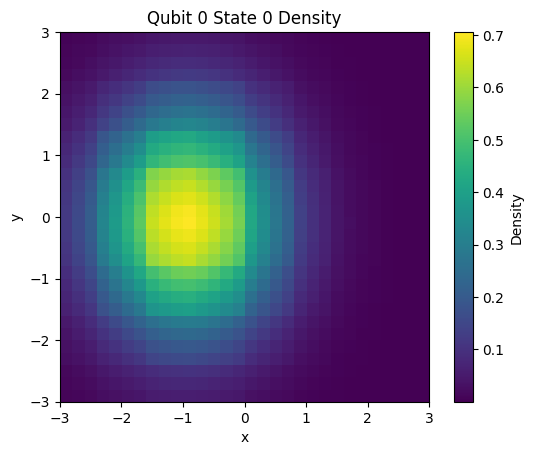

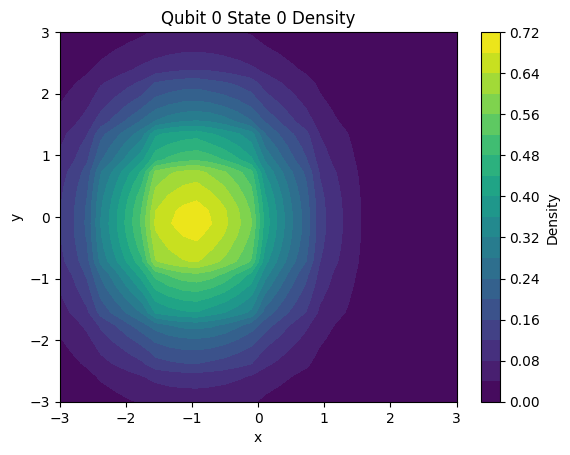

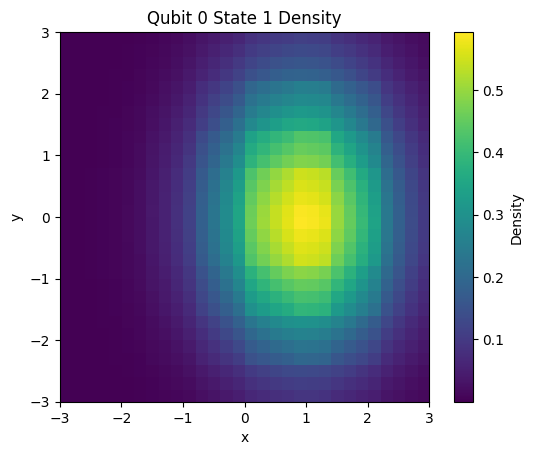

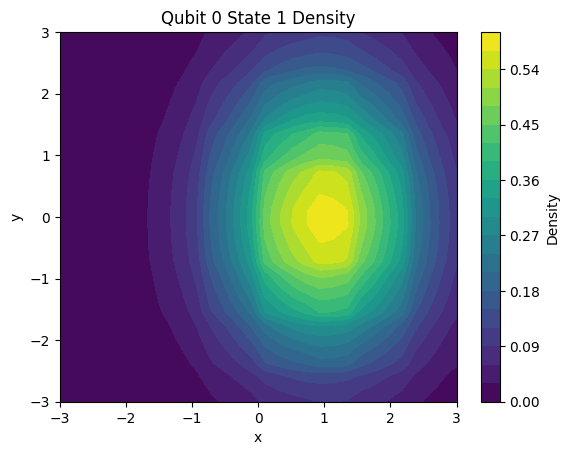

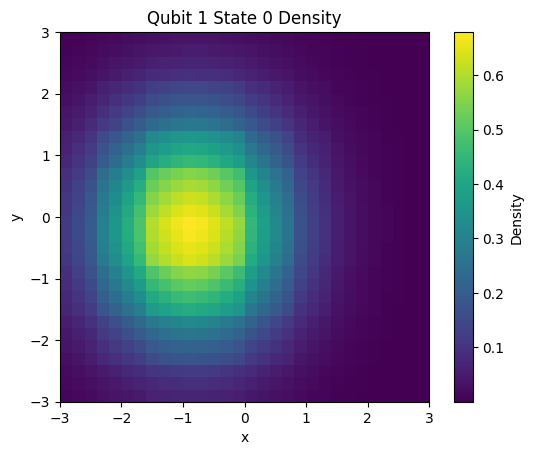

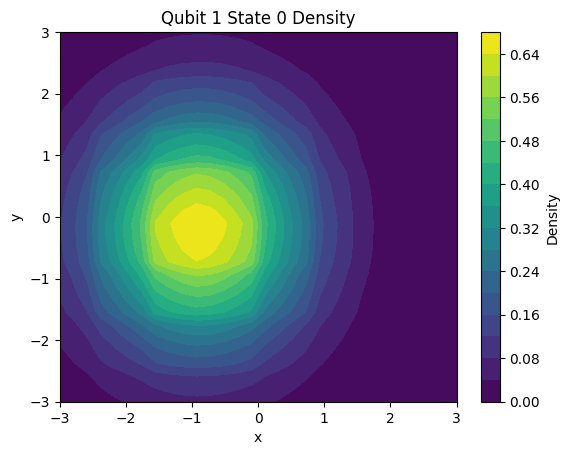

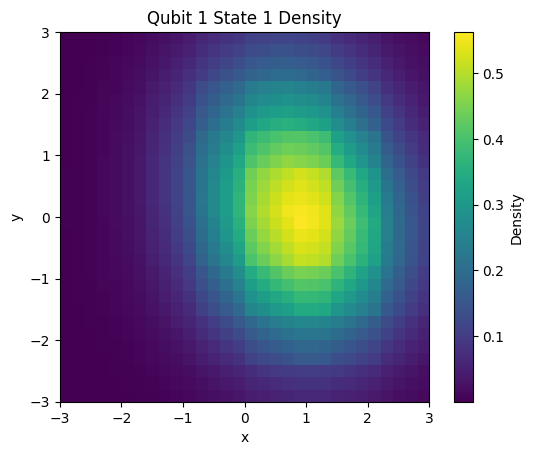

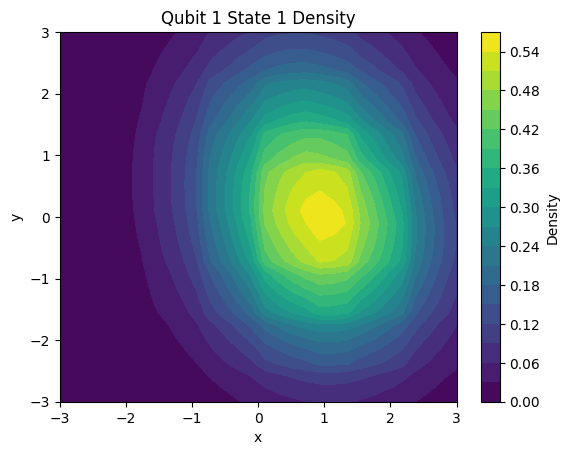

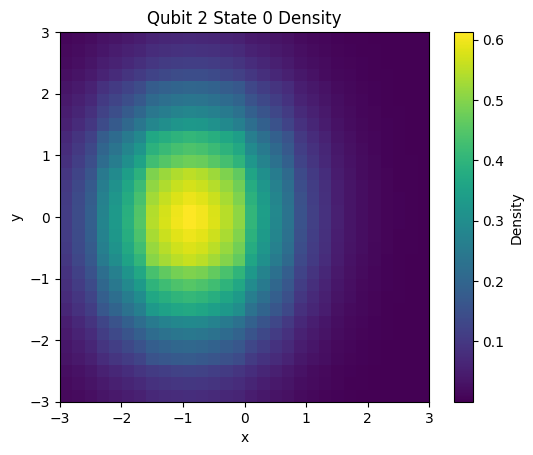

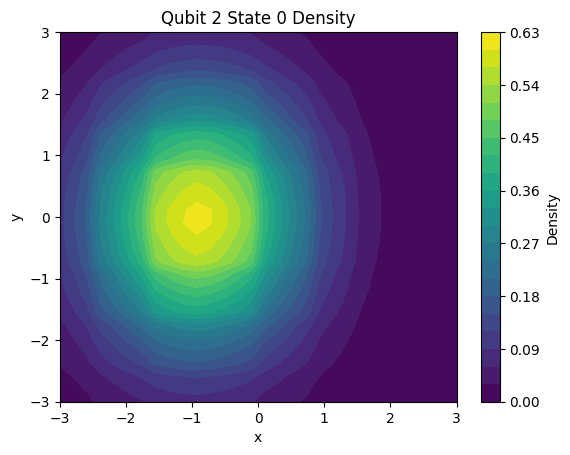

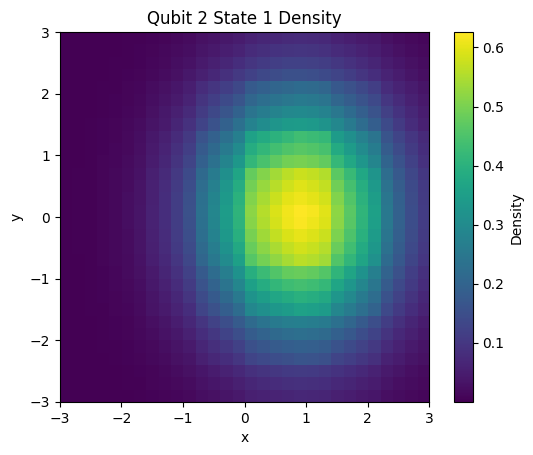

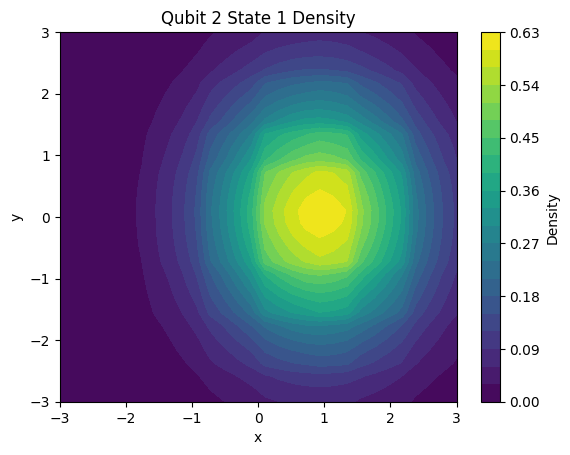

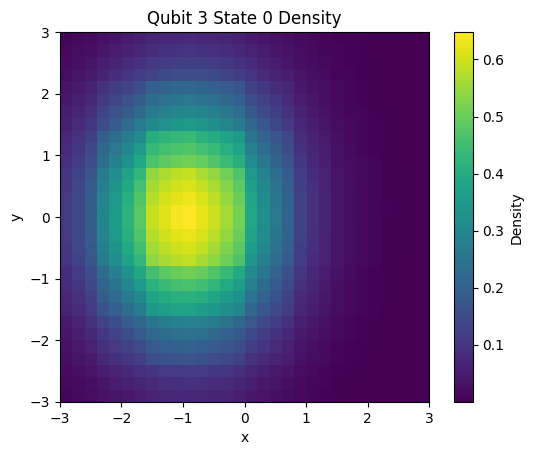

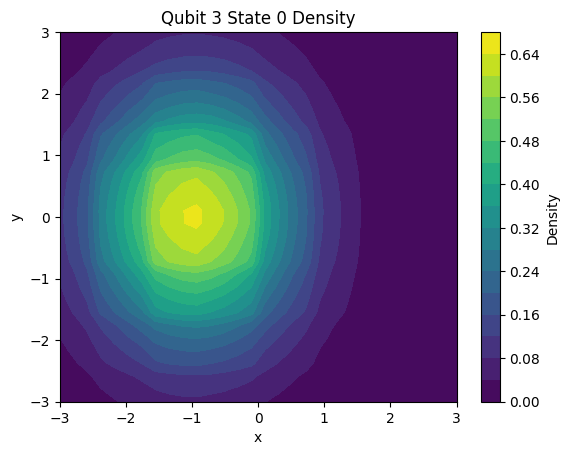

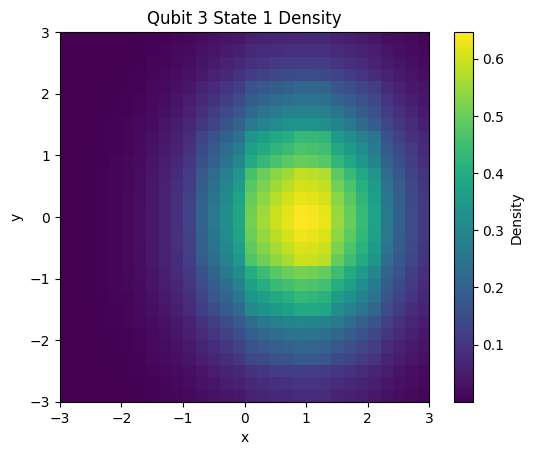

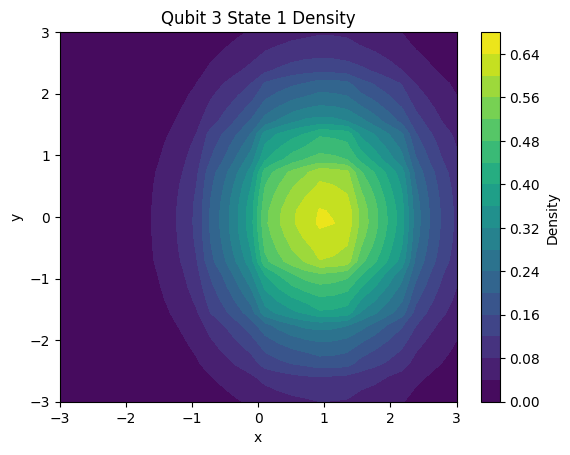

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to reshape and plot density
def plot_density(density, qubit_idx, state):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    plt.imshow(density_reshaped, extent=[-num_std, num_std, -num_std, num_std], origin='lower')
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State {state} Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def plot_density_contour(density, qubit_idx, state, num_points, num_std):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.contourf(X, Y, density_reshaped, levels=20, cmap='viridis')  # Use plt.contour for non-filled
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State {state} Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Loop through each qubit and plot the densities
for qubit_idx, (density_0, density_1) in grid_dict.items():
    if qubit_idx > 3:
        break
    plot_density(density_0, qubit_idx, state='0')
    plot_density_contour(density_0, qubit_idx, state='0', num_points=num_points, num_std=num_std)
    plot_density(density_1, qubit_idx, state='1')
    plot_density_contour(density_1, qubit_idx, state='1', num_points=num_points, num_std=num_std)


# Speed with other function

In [12]:
from Scratch import create_or_load_kde_grid


grid_dict_s = create_or_load_kde_grid(provider, tobecalib_backend="ibm_sherbrooke", num_grid_points=num_points, num_std_dev=num_std, other_date='2021-10-30')

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.
Searching for ibm_sherbrooke and 23.10.27_07h46_11pts_3std
Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.
generating grid
